In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#problem1

In [3]:
#3 Plot the function 𝑓 over 𝑥 ∈ [−2.5, 2.5]. How many local/global minima do you see? What
#are their approximate values? Can there be other local minima?

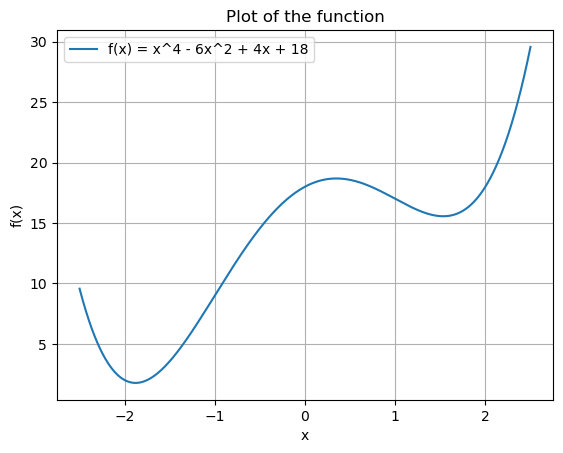

In [4]:
from scipy.optimize import minimize
#define the function f
def f(x):
    return x**4 - 6*x**2 + 4*x + 18
#generate X,Y values
x_values = np.linspace(-2.5, 2.5, 1000)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^4 - 6x^2 + 4x + 18')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.grid(True)
plt.legend()

In [5]:
#According to the plot, we can notice two local/global minimas. Their approximate values are -1.8 and 1.6. As for x 
#in the range of [-2.5,2.5], there are no other local minimas. However, there are maybe more minimas outside of the range.

In [6]:
#4 Write your own code for 𝑆 steps of GD on this function (do not use built-in or third-party
#GD codes).

In [7]:
# Define the gradient of f(x)
def gradient_f(x):
    return 4*x**3 - 12*x + 4

# define the gradient descent function
def gradient_descent(initial_x, learning_rate, num_steps):
    x_values = [initial_x]
    for _ in range(num_steps):
        current_x = x_values[-1]
        gradient = gradient_f(current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)
    return x_values

# Set parameters
initial_x = 0.0
learning_rate = 0.1
num_steps = 20

# Run Gradient Descent
trajectory = gradient_descent(initial_x, learning_rate, num_steps)

In [8]:
#5 Repeat (i) and (ii) using your code with 𝑆 = 20 steps. Do you observe convergence in both
#cases?

In [9]:
#for case(i)
initial_x = 1
learning_rate = 0.1
num_steps = 20

trajectory = gradient_descent(initial_x, learning_rate, num_steps)
trajectory

[1,
 1.4,
 1.5823999999999998,
 1.4963546415104,
 1.5517987790722083,
 1.5192154133381854,
 1.5397248375543011,
 1.5272719930151006,
 1.5350171190625246,
 1.5302671077620147,
 1.5332063790044113,
 1.5313973698196879,
 1.5325145038473287,
 1.5318260511057153,
 1.5322508642835628,
 1.5319889371285826,
 1.5321505120475563,
 1.5320508711908891,
 1.532112329575238,
 1.5320744264173558,
 1.5320978040292623]

In [10]:
#in case(i), we can notice that using the gradient descent method, the x values gradually converge to 1.53, which is
#one of the local minima. 

In [11]:
#for case(ii)
initial_x = 0
learning_rate = 0.1
num_steps = 20

trajectory = gradient_descent(initial_x, learning_rate, num_steps)
trajectory

[0,
 -0.4,
 -1.2544,
 -2.3701509259264,
 -0.28849348925106977,
 -1.0250813249728175,
 -2.2243201263455896,
 -0.8914857533491816,
 -2.077866460212338,
 -1.3828067104246002,
 -2.384518789546544,
 -0.22265870431016221,
 -0.8854336582795075,
 -2.070284616055942,
 -1.405265292488476,
 -2.3815530420008457,
 -0.2363445410729268,
 -0.9146772268543001,
 -2.1061897151968125,
 -1.2963647580668578,
 -2.380554142228462]

In [12]:
#in case(ii), x values fluctuated, so we cannot observe the covergence in x values. 

In [13]:
#5 Now set the learning rate to 𝛼 = 0.01 and repeat (v). Explain why GD performs differently
#from (v).

In [14]:
#for case(i)
initial_x = 1
learning_rate = 0.01
num_steps = 20

trajectory = gradient_descent(initial_x, learning_rate, num_steps)
trajectory

[1,
 1.04,
 1.0798054400000001,
 1.119020840068549,
 1.1572534830439267,
 1.1941304973887767,
 1.229315454262303,
 1.262522837530415,
 1.2935289442241535,
 1.3221782260494936,
 1.3483847002782723,
 1.372128707840095,
 1.3934498428239785,
 1.4124372242060033,
 1.4292183920198969,
 1.4439480114680723,
 1.4567973253950453,
 1.4679449872507762,
 1.4775696023631308,
 1.4858440513255176,
 1.4929314867366945]

In [15]:
#for case(ii)
initial_x = 0
learning_rate = 0.01
num_steps = 20

trajectory = gradient_descent(initial_x, learning_rate, num_steps)
trajectory

[0,
 -0.04,
 -0.08479744,
 -0.1349487430013408,
 -0.1910442892180012,
 -0.2536906951534041,
 -0.3234804877103682,
 -0.40094419114643426,
 -0.4864793227884729,
 -0.5802515921846035,
 -0.6820671425672264,
 -0.791222869032004,
 -0.9063563283704102,
 -1.025336878870371,
 -1.1452591933707572,
 -1.2626045652651865,
 -1.3736048457479124,
 -1.4747692568020896,
 -1.5634399244753172,
 -1.6381892906071331,
 -1.6989180105534625]

In [16]:
#in both cases, we can notice that there is a trend of convergence, but in the first 20 steps, the x has not converged 
#to a certain value. This is because we set the learning rate alpha from 0.1 to 0.01, which makes each step much smaller.
#For case(i), it will take more steps to converge. And for case(ii), smaller step makes it possible to observe the convergence. 

In [17]:
#problem2

In [18]:
data = pd.read_csv("College.csv")
data.dropna(inplace=True)

In [19]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [20]:
len(data)

777

In [21]:
#1 Let the first 600 observations be the training set and the remaining 177 observations be the
#test set.

In [22]:
#Change the column Private to dummy variables
data = pd.get_dummies(data, columns=['Private'], drop_first=True)

In [23]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True


In [24]:
data_train = data[:600]
data_test = data[600:]

In [25]:
len(data_train)

600

In [26]:
len(data_test)

177

In [27]:
#2 Fit the OLS regression on the training set, and report the test error obtained

In [31]:
data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private_Yes'],
      dtype='object')

In [33]:
# Extract features (X) and target variable (Y) for training set and the testing set
X_train = data_train.drop('Apps', axis=1)
Y_train = data_train['Apps']
X_test = data_test.drop('Apps', axis=1)
Y_test = data_test['Apps']
# Fit OLS regression on the training set
ols_model = LinearRegression()
ols_model.fit(X_train, Y_train)

# Predict on the test set
test_predictions = ols_model.predict(X_test)

# Calculate the mean squared error on the test set
test_error = mean_squared_error(Y_test, test_predictions)

# Report the test error
print(f"Test Error (Mean Squared Error): {test_error:.3f}")


Test Error (Mean Squared Error): 1502077.435


In [34]:
#3 Fit the LASSO regression on the training set, with the penalization parameter chosen by
#20-fold cross-validation. Report the test error obtained.

In [35]:
from sklearn.linear_model import LassoCV
# Lasso Regression with cross-validated alpha
lasso_model = LassoCV(alphas=np.logspace(0.01, 60, 1000), cv=20)
lasso_model.fit(X_train, Y_train)

# Find the best alpha
best_alpha_lasso = lasso_model.alpha_

# Predict on the test set for Lasso
lasso_test_predictions = lasso_model.predict(X_test)

# Calculate the mean squared error on the test set
lasso_test_error = mean_squared_error(Y_test, lasso_test_predictions)

# Report the test error and the chosen alpha
print(f"Lasso Test Error (Mean Squared Error): {lasso_test_error:.3f} with alpha={best_alpha_lasso:.3f}")


Lasso Test Error (Mean Squared Error): 1502373.778 with alpha=4.079


In [36]:
#4 Fit the ridge regression on the training set, with the penalization parameter chosen by leaveone-
#out cross-validation. Report the test error obtained

In [37]:
from sklearn.linear_model import RidgeCV
# Ridge Regression with leave-one-out cross-validated alpha
ridge_model = RidgeCV(alphas=np.logspace(0.01, 60, 1000), store_cv_values=True)
#RidgeCV is used with store_cv_values=True to perform LOOCV.
ridge_model.fit(X_train, Y_train)

# Find the best alpha
best_alpha_ridge = ridge_model.alpha_

# Predict on the test set for Ridge
ridge_test_predictions = ridge_model.predict(X_test)

# Calculate the mean squared error on the test set
ridge_test_error = mean_squared_error(Y_test, ridge_test_predictions)

# Report the test error and the chosen alpha
print(f"Ridge Test Error (Mean Squared Error): {ridge_test_error:.3f} with alpha={best_alpha_ridge:.3f}")


Ridge Test Error (Mean Squared Error): 1504869.277 with alpha=24.612


In [38]:
#5 Which of the three models do you prefer? Is there much difference among the test errors?

In [39]:
#In this case, OLS model is better, because it has the smallest MSE. Also, there is not much difference among the test errors.
# This may arise from the underlying relationship in the data which is close to linear, OLS might capture it well.
#Or If all the features in  dataset are important for prediction, and there is no need for regularization, OLS might be more suitable.